# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, on=["Mouse ID"])
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice.
total_mice = mouse_results["Mouse ID"].count()
total_mice

1893

In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouses = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mouses



array(['g989'], dtype=object)

In [118]:
#g989 is the only ID, but it is occuring multiple times. 
# Many ways to get rid of duplicates, .loc is one way--you can use this to see all data that belongs to this ID. 

duplicated_data = mouse_results.loc[mouse_results["Mouse ID"] == "g989"]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicated_mouses_df = mouse_results[mouse_results.duplicated(["Mouse ID", "Timepoint"])]
#duplicated_mouses_df

In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_results = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
cleaned_mouse_results



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [121]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_results.index)

1880

## Summary Statistics

In [122]:
# Generate a summary statistics table of:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

regimen_stats = cleaned_mouse_results.groupby(["Drug Regimen"])

tumor_sum_stats = pd.DataFrame()

tumor_sum_stats["Mean"] = regimen_stats["Tumor Volume (mm3)"].mean()
tumor_sum_stats["Median"] = regimen_stats["Tumor Volume (mm3)"].median()
tumor_sum_stats["Variance"] = regimen_stats["Tumor Volume (mm3)"].var()
tumor_sum_stats["Std Dev"] = regimen_stats["Tumor Volume (mm3)"].std()
tumor_sum_stats["SEM"] = regimen_stats["Tumor Volume (mm3)"].sem()

tumor_sum_stats



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

other_regimen_stats = regimen_stats.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}) 
other_regimen_stats 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

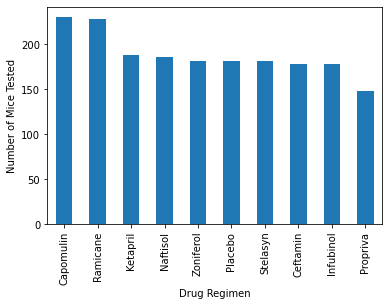

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
values = cleaned_mouse_results.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar_fig = values.plot(kind="bar", ylabel = "Number of Mice Tested")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

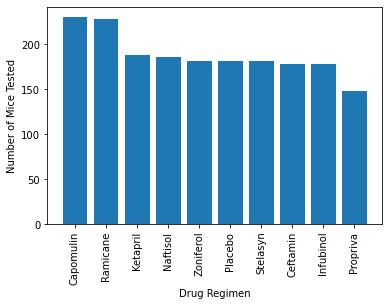

In [125]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
values = cleaned_mouse_results.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
x_axis = values.index

plt.bar(x_axis, values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)


<AxesSubplot:ylabel='Sex'>

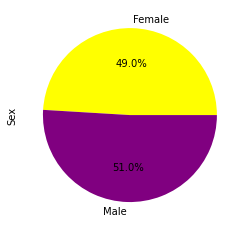

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors=["Yellow", "Purple"]
sizes = cleaned_mouse_results.groupby(["Sex"])["Mouse ID"].count()
sizes.plot(kind="pie", ylabel = "Sex", autopct="%1.1f%%", colors=colors)


Text(0, 0.5, 'Sex')

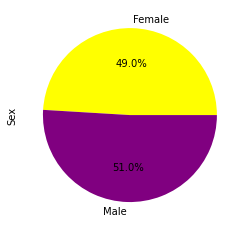

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = cleaned_mouse_results.groupby(["Sex"])["Mouse ID"].count()
gender = sizes.index

plt.pie(sizes, labels=gender, autopct="%1.1f%%", colors=colors)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [128]:
cleaned_mouse_results.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(cleaned_mouse_results.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(cleaned_mouse_results, last_timepoint, on=("Mouse ID", "Timepoint"), how="right")
final_df = final_df.rename(columns={"Timepoint": "Final Timepoint", "Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint,Final Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [130]:
# Put treatments into a list for the "for loop" (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty lists for each treatment to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# Use iterrows() to iterate through each row to add to the treatment's list.
# iterrows() iterates over Dataframe rows as (index, Series) pairs. 
for index, row in final_df.iterrows():     
    if row["Drug Regimen"]  == treatments[0]:
        tumor_cap.append(row["Final Tumor Volume (mm3)"])
    if row["Drug Regimen"]  == treatments[1]:
        tumor_ram.append(row["Final Tumor Volume (mm3)"])        
    if row["Drug Regimen"]  == treatments[2]:
        tumor_inf.append(row["Final Tumor Volume (mm3)"])
    if row["Drug Regimen"]  == treatments[3]:
        tumor_cef.append(row["Final Tumor Volume (mm3)"])

# Compile all lists into a single dataframe
plotting_df = pd.DataFrame({ treatments[0]: tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })

In [131]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    quartiles = plotting_df[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Outliers
    values = plotting_df[treatment] #Store all values in new list
    outliers = [x for x in values if x < lower_bound or x > upper_bound] #use list comp to find outliers
   
    msg = f"""
        {treatment}
        ---------------------------
        Lower Quartile: {round(lowerq,2)}
        Upper Quartile: {round(upperq,2)}
        Interquartile range: {round(iqr,2)}
        Lower Bound: {round(lower_bound,2)}
        Upper Bound: {round(upper_bound,2)}
        Outliers: {outliers}
        """
    print(msg)


        Capomulin
        ---------------------------
        Lower Quartile: 32.38
        Upper Quartile: 40.16
        Interquartile range: 7.78
        Lower Bound: 20.7
        Upper Bound: 51.83
        Outliers: []
        

        Ramicane
        ---------------------------
        Lower Quartile: 31.56
        Upper Quartile: 40.66
        Interquartile range: 9.1
        Lower Bound: 17.91
        Upper Bound: 54.31
        Outliers: []
        

        Infubinol
        ---------------------------
        Lower Quartile: 54.05
        Upper Quartile: 65.53
        Interquartile range: 11.48
        Lower Bound: 36.83
        Upper Bound: 82.74
        Outliers: [36.3213458]
        

        Ceftamin
        ---------------------------
        Lower Quartile: 48.72
        Upper Quartile: 64.3
        Interquartile range: 15.58
        Lower Bound: 25.36
        Upper Bound: 87.67
        Outliers: []
        


In [132]:
plotting_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


Text(0, 0.5, 'Final Tumor Volumes (mm3)')

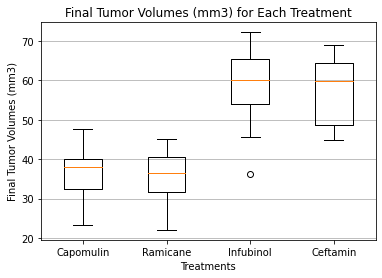

In [114]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(plotting_df, labels=treatments)
ax.set_title("Final Tumor Volumes (mm3) for Each Treatment")
ax.yaxis.grid(True)
ax.set_xlabel("Treatments")
ax.set_ylabel("Final Tumor Volumes (mm3)")

## Line and Scatter Plots

### Line Plot

Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin.

In [142]:
# Grab all instances of Capomulin being tested from mouse results dataframe. 
all_capomulin = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"]
all_capomulin["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [145]:
# Create a dataframe with all the data for one arbitratily chosen mouse from the above list (s185).
single_mouse_results = mouse_results.loc[mouse_results["Mouse ID"] == "s185"]
single_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


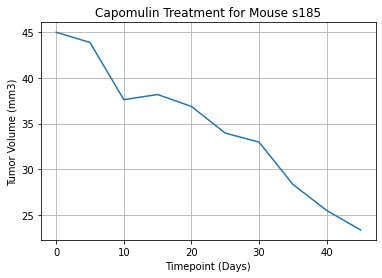

In [153]:
# Plot by accessing dataframe. 
plt.plot(single_mouse_results["Timepoint"],single_mouse_results["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse s185")
plt.grid(axis="both")

### Scatterplot

Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

In [158]:
# Group all capomulin dataframe by mouse ID, and grab average tumor volume for each. 
capomulin_mean_tum = all_capomulin.groupby(["Mouse ID"]).mean()
capomulin_mean_tum

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0.5, 1.0, 'Capomulin: Average Tumor Volume vs. Mouse Weight')

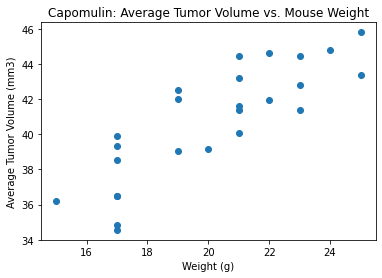

In [161]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_mean_tum["Weight (g)"], capomulin_mean_tum["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


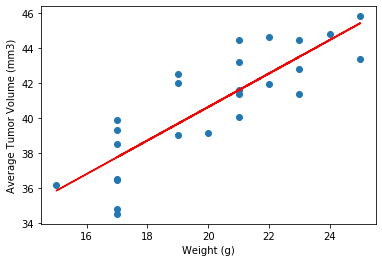

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

